In [1]:
import numpy as np
from keras.datasets import mnist

import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1' 
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
# config.gpu_options.per_process_gpu_memory_fraction = 0.48
set_session(tf.Session(config=config))

import sys  
sys.path.append('../')
from util.util import *
from util import importNotebook
from module.autoencoder import VAE, ConvVAE

Using TensorFlow backend.


importing Jupyter notebook from ../module/autoencoder.ipynb


# Example of VAE

(60000, 784)
(10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.3198 - val_loss: 0.2608

Epoch 00001: val_loss improved from inf to 0.26077, saving model to ../model/temp/AutoEncoder.01-0.32-0.26.hdf5
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2659 - val_loss: 0.2460

Epoch 00002: val_loss improved from 0.26077 to 0.24598, saving model to ../model/temp/AutoEncoder.02-0.27-0.25.hdf5
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.2553 - val_loss: 0.2398

Epoch 00003: val_loss improved from 0.24598 to 0.23976, saving model to ../model/temp/AutoEncoder.03-0.26-0.24.hdf5
Epoch 4/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.2505 - val_loss: 0.2374

Epoch 00004: val_loss improved from 0.23976 to 0.23737, saving model to ../model/temp/AutoEncoder.04-0.25-0.24.hdf5
Epoch 5/10
60000/60000 [================

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 16)           12560       input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 16)           0           dense_1[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 16)           0           leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
dense_2 (D

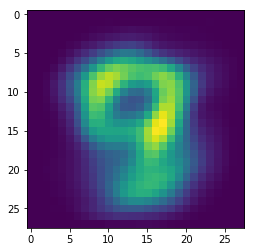

In [2]:
# Load dataset
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.
numTrain = len(xTrain)
numTest = len(xTest)
sizeDigit = xTrain.shape[1:]
dimInput = np.prod(xTrain.shape[1:]) # dimInput is width*height
xTrain = xTrain.reshape((numTrain, dimInput))
xTest = xTest.reshape((numTest, dimInput))
print(xTrain.shape)
print(xTest.shape)

# Set parameters
numEpochs = 10
sizeBatch = 128
sizeKernel = 3
layerDense = [16, 2]
layerConv = [4, 16]
ratRecon = 1
nameOptim = 'adam'
pathTempBest = '../model/temp'
pathModel = '../model/example/VAE'
patience = 3

# Initialize and train
vae = VAE(dimInput, layerDense=layerDense, ratRecon=ratRecon)
history, timeTrain = vae.fit(xTrain, xTest, 
                             numEpochs=numEpochs,
                             sizeBatch=sizeBatch,
                             nameOptim=nameOptim,
                             pathTempBest=pathTempBest)

# Get the encoder and decoder from the trained model directly
encoder = vae.encoder
decoder = vae.decoder
autoencoder = vae.autoencoder
encoder.summary()
decoder.summary()
autoencoder.summary()

# Save the trained model and load from the path to resume as encoder, decoder, and autoencoder
vae.save(pathModel)
encoder, decoder, autoencoder = VAE.load(pathModel)
encoder.summary()
decoder.summary()
autoencoder.summary()

# Encode testing dataset and get generated reconstruction
encode = encoder.predict(xTest)
generate = decoder.predict(np.array([[0, 0]]))
plt.imshow(generate.reshape(sizeDigit))

# Example of Convolutional VAE

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.2968 - val_loss: 0.2369

Epoch 00001: val_loss improved from inf to 0.23689, saving model to ../model/temp/AutoEncoder.01-0.30-0.24.hdf5
Epoch 2/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2372 - val_loss: 0.2221

Epoch 00002: val_loss improved from 0.23689 to 0.22205, saving model to ../model/temp/AutoEncoder.02-0.24-0.22.hdf5
Epoch 3/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.2284 - val_loss: 0.2157

Epoch 00003: val_loss improved from 0.22205 to 0.21570, saving model to ../model/temp/AutoEncoder.03-0.23-0.22.hdf5
Epoch 4/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.2246 - val_loss: 0.2133

Epoch 00004: val_loss improved from 0.21570 to 0.21333, saving model to ../model/temp/AutoEncoder.04-0.22-0.21.hdf5
Epoch 5/10
60000/60000 [===

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 4)    40          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 7, 7, 16)     592         conv2d_1[0][0]                   
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 784)          0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
dense_5 (D

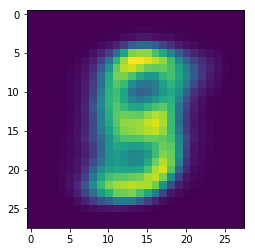

In [3]:
# Load dataset
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()
xTrain = xTrain.astype('float32') / 255.
xTest = xTest.astype('float32') / 255.
numTrain = len(xTrain)
numTest = len(xTest)
sizeDigit = xTrain.shape[1:]
dimInput = [*xTrain.shape[1:], 1] # dimInput is (width, height, channels)
xTrain = xTrain.reshape((numTrain, *dimInput))
xTest = xTest.reshape((numTest, *dimInput))
print(xTrain.shape)
print(xTest.shape)

# Set parameters
numEpochs = 10
sizeBatch = 128
sizeKernel = 3
layerDense = [16, 2]
layerConv = [4, 16]
ratRecon = 1
nameOptim = 'adam'
pathTempBest = '../model/temp'
pathModel = '../model/example/ConVAE'
patience = 3

# Initialize and train
convVAE = ConvVAE(dimInput, layerDense=layerDense, layerConv=layerConv, ratRecon=ratRecon)
history, timeTrain = convVAE.fit(xTrain, xTest, 
                                 numEpochs=numEpochs,
                                 sizeBatch=sizeBatch,
                                 pathTempBest=pathTempBest)

# Get the encoder and decoder from the trained model directly
encoder = convVAE.encoder
decoder = convVAE.decoder
autoencoder = convVAE.autoencoder
encoder.summary()
decoder.summary()
autoencoder.summary()

# Save the trained model and load from the path to resume as encoder, decoder, and autoencoder
convVAE.save(pathModel)
encoder, decoder, autoencoder = ConvVAE.load(pathModel)
encoder.summary()
decoder.summary()
autoencoder.summary()

# Encode testing dataset and get generated reconstruction
encode = encoder.predict(xTest)
generate = decoder.predict(np.array([[0, 0]]))
plt.imshow(generate.reshape(sizeDigit))